<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/MetacodeM/blob/main/CreditCardFraudDetection_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection** - Anomaly Detecting Project

---



**Project Objectives**
1. 불균형 데이터 문제 해결 (99.83% Non Fraud & 0.17% Fraud)
    *   불균형 유지
    *   Undersampling
2. 다양한 모델을 적용하여 최고 성능 모델 찾기
    *   Linear Regression
    *   Shallow Neural Network
    *   Deep Neural Network
    *   Random Forest - original only
3. 적절한 Metrics 사용을 통한 성능 평가
    *   Accuracy
    *   F1 Score
        *   Precision
        *   Recall

---



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

## **1.0 Loading Dataset from Google Drive**


*   284,807 transaction with 31 columns
*   31st column = fraud/non-fraud



In [ ]:
# Loading Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/creditcard/creditcard.csv", delimiter=',', dtype=np.float32)
print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0.0


## 2.0 **Data Visualization and Analysis**
제공된 데이터는 PCA를 통해 차원축소 및 scaling이 이미 적용된 데이터 입니다.


*   V1 ~ V28은 Masking된 데이터로 무슨 목적을 하는 데이터인지 알 수 없습니다.
*   시각화를 통해 값들의 범위와 분포를 확인합니다.



array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>],
       [<Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>,
        <Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>],
       [<Axes: title={'center': 'V9'}>, <Axes: title={'center': 'V10'}>,
        <Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>],
       [<Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>,
        <Axes: title={'center': 'V18'}>],
       [<Axes: title={'center': 'V19'}>, <Axes: title={'center': 'V20'}>,
        <Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes:

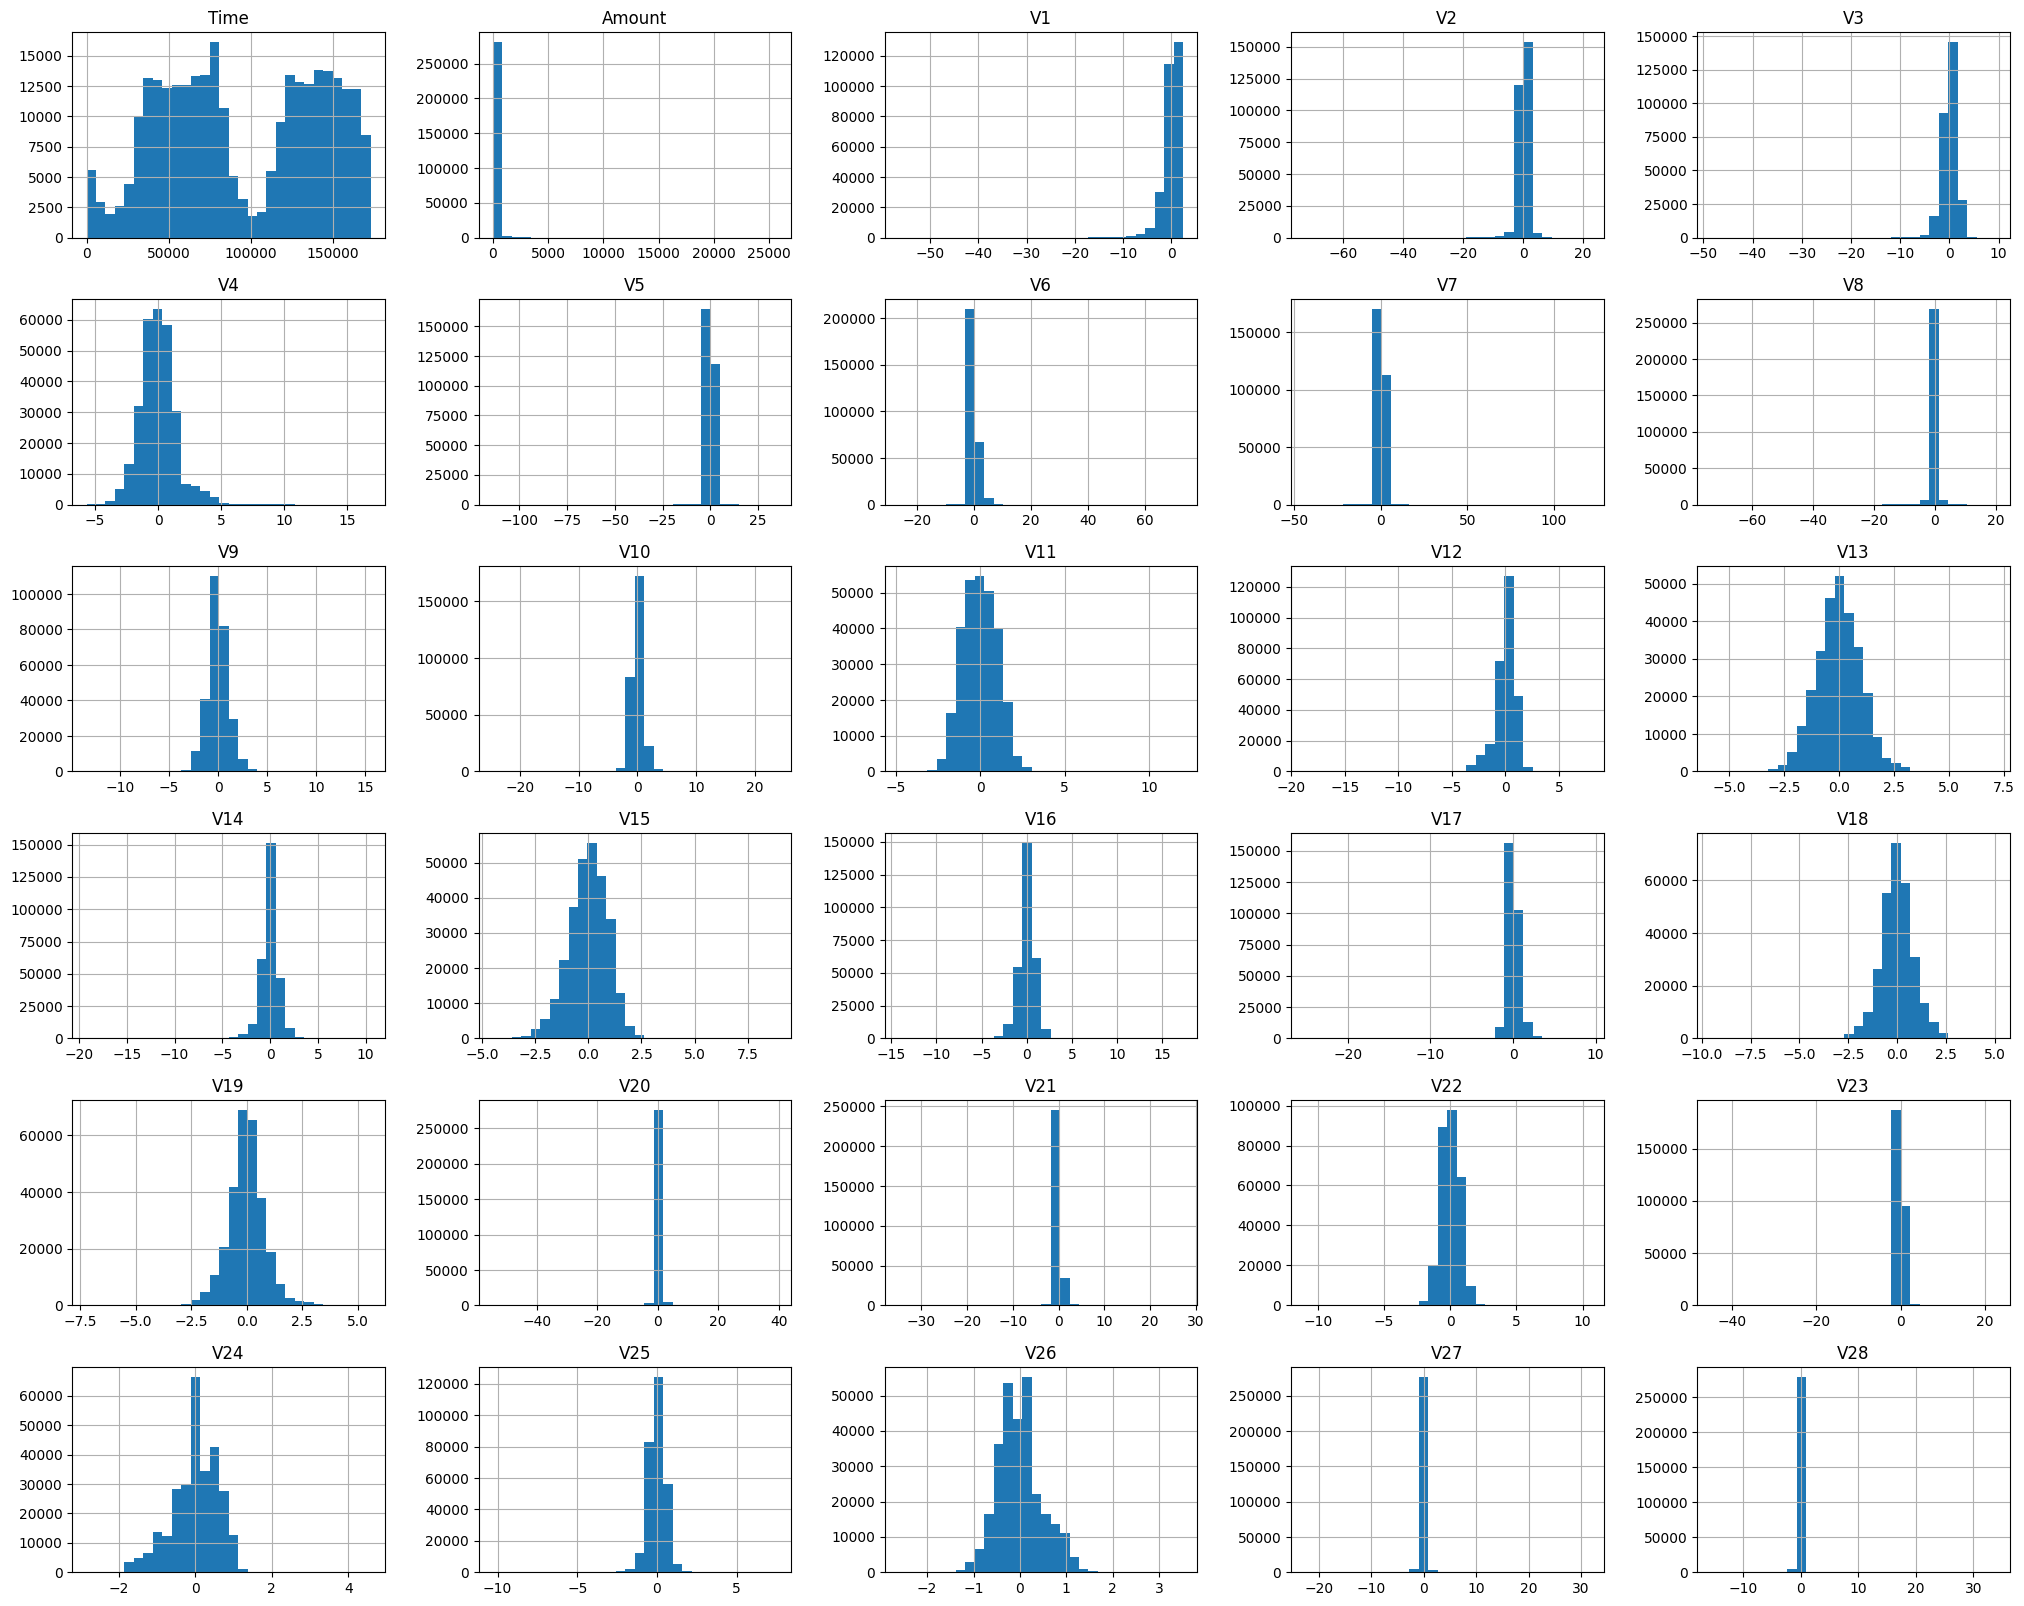

In [ ]:
# Histogram - Visualize Dataset Distribution
df.hist(column=["Time", "Amount", "V1", "V2", "V3", "V4",
                "V5", "V6", "V7", "V8", "V9", "V10", "V11",
                "V12", "V13", "V14", "V15", "V16", "V17", "V18",
                "V19", "V20", "V21", "V22", "V23", "V24", "V25",
                "V26", "V27", "V28"
                ],bins=30, figsize=(25,20))

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.867188,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,88.349609,0.001727
std,47488.144531,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120117,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165001,0.000000
max,172792.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160156,1.000000


### **2.1 Data Processing**
Time과 Amount 값은 PCA를 거치지 않았기에 STD value가 너무 높아 Training에 문제가 될 수 있어 가공이 필요합니다.

*   Time - MinMaxScaler: 시간 흐름 유지
*   Amount - RobustScaler: Outlier의 영향력 하락





In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
new_df = df.copy()
time = new_df['Time']
# new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df['Time'] = MinMaxScaler().fit_transform(new_df['Time'].to_numpy().reshape(-1,1))
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))

In [ ]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.548717,1.339397e-08,0.000000,-4.800400e-08,6.643411e-09,2.657364e-08,-1.500125e-09,-1.071518e-09,-1.071518e-10,-3.214554e-10,...,-1.928732e-09,3.643161e-09,3.214554e-10,1.259033e-09,2.143036e-09,1.034684e-09,1.138488e-10,-1.272427e-10,0.927124,0.001727
std,0.274828,1.958696e+00,1.651309,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,0.000000,-5.640751e+01,-72.715729,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,0.313681,-9.203734e-01,-0.598550,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.490138,1.810880e-02,0.065486,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097605e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.806290,1.315642e+00,0.803724,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273458e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.000000,2.454930e+00,22.057730,9.382559e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519588e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683167,1.000000


### **2.2 Data Splitting (Imbalanced 유지)** - *Train, Validation, Test*
데이터 불균형을 해결하지 않고 모델을 학습시킬 경우

In [ ]:
new_df = new_df.sample(frac=1, random_state=1)
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(),test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0.0    239589
 1.0       411
 Name: count, dtype: int64,
 Class
 0.0    21955
 1.0       45
 Name: count, dtype: int64,
 Class
 0.0    22771
 1.0       36
 Name: count, dtype: int64)

In [ ]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [ ]:
x_train, y_train = train_np[:, :-1], train_np[:,-1]
x_test, y_test = test_np[:, :-1], test_np[:,-1]
x_val, y_val = val_np[:, :-1], val_np[:,-1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

### **2.3 Imbalanced Logistic Regression**
Accuracy - 99.92%가 나왔지만 anomaly detection이 주 목적이어서 F1의 성능으로 평가 하여야 합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9992375

### **2.3.1 Result - F1 Score**
F1 Score로 분석 시 Accuracy와는 다르게 성능이 많이 떨어진다는 것을 알 수 있습니다.

Not Fraud의 precision, recall, f1-score 모두 1.0을 보여줍니다.

문제는 Fraud의 정밀도도 떨어지지만 recall(alarm)이 너무 낮아 fraud인 경우임에도 놓치는 경우가 많다는 것을 알려줍니다.


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=["Not Fraud (0)", "Fraud (1)"]))

               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00     22771
    Fraud (1)       0.73      0.53      0.61        36

     accuracy                           1.00     22807
    macro avg       0.87      0.76      0.81     22807
 weighted avg       1.00      1.00      1.00     22807



### **2.4 Imbalanced Shallow Neural Network**
얕은 NN의 모델을 생성하여 성능을 측정해봅니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer(x_train.shape[1]))
shallow_nn.add(Dense(10,'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)

shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics="accuracy")

In [ ]:
shallow_nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 341 (1.33 KB)
Non-trainable params: 20 (80.00 Byte)
_________________________________________________________________


In [ ]:
def nn_prediction(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)

In [ ]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 26s 3ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0058 - val_accuracy: 0.9990
Epoch 2/5
7500/7500 [==============================] - 19s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0052 - val_accuracy: 0.9991
Epoch 3/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0068 - val_accuracy: 0.9989
Epoch 4/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0056 - val_accuracy: 0.9991
Epoch 5/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0066 - val_accuracy: 0.9989


### **2.4.1 Result - F1 Score**
Accuracy의 경우 최대 training:99.94% validation:99.90%를 보여주었지만

precision의 낮고 recall이 높게 나왔다 이는 Fraud라고 예측하는 횟수는 많지만 아닐경우가 많다는 뜻이다.
*   Anomaly Detection의 경우 주요 목적과 상황에 따라 다르지만 대체로 recall은 높게 나와야하며 True Negative 값을 놓치지 않는게 중요하다.



In [ ]:
print(classification_report(y_val, nn_prediction(shallow_nn, x_val), target_names=["Not Fraud", "Fraud"]))

713/713 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.62      0.78      0.69        36

    accuracy                           1.00     22807
   macro avg       0.81      0.89      0.85     22807
weighted avg       1.00      1.00      1.00     22807



### **2.5 Imbalanced Random Forest**
Random Forest 모델을 사용하였을 경우 성능 향상이 있는지를 비교합니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=-1)

### **2.5.1 Result - F1 Score**
이번 경우에는 모델이 fraud라고 예측할 경우 precision이 높게 나오지만 많은 fraud들을 놓친다는 뜻입니다.

In [ ]:
print(classification_report(y_val, rf.predict(x_val), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.80      0.44      0.57        36

    accuracy                           1.00     22807
   macro avg       0.90      0.72      0.79     22807
weighted avg       1.00      1.00      1.00     22807



### **2.6 Imbalanced Deep Neural Network**

In [ ]:
deep_nn = Sequential()
deep_nn.add(InputLayer(x_train.shape[1]))
deep_nn.add(Dense(30,'relu'))
deep_nn.add(BatchNormalization())
deep_nn.add(Dense(20,'relu'))
deep_nn.add(Dense(10,'relu'))
deep_nn.add(BatchNormalization())
deep_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('deep_nn', save_best_only=True)

deep_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics="accuracy")

In [ ]:
deep_nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_5 (Bat  (None, 30)                120       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                                 
 dense_12 (Dense)            (None, 10)                210       
                                                                 
 batch_normalization_6 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
deep_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, callbacks=checkpoint)

Epoch 1/10
7500/7500 [==============================] - 27s 3ms/step - loss: 0.0268 - accuracy: 0.9934 - val_loss: 0.0110 - val_accuracy: 0.9991
Epoch 2/10
7500/7500 [==============================] - 54s 7ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0090 - val_accuracy: 0.9989
Epoch 3/10
7500/7500 [==============================] - 25s 3ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0087 - val_accuracy: 0.9989
Epoch 4/10
7500/7500 [==============================] - 21s 3ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0076 - val_accuracy: 0.9991
Epoch 5/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9992
Epoch 6/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0082 - val_accuracy: 0.9988
Epoch 7/10
7500/7500 [==============================] - 21s 3ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0039 - val_ac

### **2.6.1 Result - F1 Score**
이전 결과물들에 비해 높은 f1 score가 나오긴 했지만 여전히 전체적인 수치가 낮습니다.

이를 해결하기 위해서는 imbalanced dataset 문제를 해결해야 합니다.

In [ ]:
print(classification_report(y_val, nn_prediction(deep_nn, x_val), target_names=["Not Fraud", "Fraud"]))

713/713 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.74      0.78      0.76        36

    accuracy                           1.00     22807
   macro avg       0.87      0.89      0.88     22807
weighted avg       1.00      1.00      1.00     22807



## **3.0 Balancing Dataset - Undersampling**

In [ ]:
not_fraud = new_df.query('Class == 0')
fraud = new_df.query('Class == 1')
not_fraud['Class'].value_counts(), fraud['Class'].value_counts()

(Class
 0.0    284315
 Name: count, dtype: int64,
 Class
 1.0    492
 Name: count, dtype: int64)

In [ ]:
under_df = pd.concat([fraud, not_fraud.sample(len(fraud), random_state=1)])

In [ ]:
under_df['Class'].value_counts()

Class
1.0    492
0.0    492
Name: count, dtype: int64

In [ ]:
under_df = under_df.sample(frac=1, random_state=42)
under_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19030,0.173428,0.870035,1.150371,-0.107640,2.926943,0.589009,0.053481,0.311675,-1.071551,-1.349765,...,0.805089,-0.047634,-0.071834,-0.412454,0.106794,0.248130,0.275207,0.316998,-0.178858,0.0
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1.0
2681,0.012865,-1.014510,1.003668,1.447820,-1.200423,-0.490699,-0.847863,0.191709,0.498659,-0.202517,...,0.009143,-0.028588,0.051347,0.431757,-0.437568,0.731000,0.149978,0.109183,-0.251659,0.0
239501,0.868900,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,3.007895,1.0
143336,0.493570,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,3.226717,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41395,0.235323,-4.446846,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,-0.293440,1.0
142557,0.490700,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,4.643750,1.0
201579,0.775192,-1.242195,-0.381435,0.747916,-1.574418,0.648519,1.815775,-0.513824,1.096029,-0.920652,...,-0.484754,-1.091095,0.360347,-0.862552,-0.654657,-0.489666,0.087959,-0.000028,0.475093,0.0
239499,0.868894,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,0.391253,1.0


In [ ]:
under_df_np = under_df.to_numpy()

x_train_b, y_train_b = under_df_np[:700, :-1], under_df_np[:700, -1].astype(int)
x_test_b, y_test_b = under_df_np[700:842, :-1], under_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = under_df_np[842:, :-1], under_df_np[842:, -1].astype(int)

x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [ ]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    357
 0    343
 Name: count, dtype: int64,
 0    86
 1    56
 Name: count, dtype: int64,
 1    79
 0    63
 Name: count, dtype: int64)

### **3.1 Balanced Logistic Regression**

In [ ]:
logistic_model_bal = LogisticRegression()
logistic_model_bal.fit(x_train_b, y_train_b)
logistic_model_bal.score(x_train_b, y_train_b)

0.9614285714285714

## **3.1.1 Result - F1 Score**
Balanced가 된 이후부터는 Not Fraud의 오류도 늘어났지만 Fraud의 발견률도 올라갔습니다.

In [ ]:
print(classification_report(y_val_b, logistic_model_bal.predict(x_val_b), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.98      0.95        63
       Fraud       0.99      0.92      0.95        79

    accuracy                           0.95       142
   macro avg       0.95      0.95      0.95       142
weighted avg       0.95      0.95      0.95       142



### **3.2 Balanced Shallow Neural Network**

In [ ]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(10, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 2s 50ms/step - loss: 0.5581 - accuracy: 0.7229 - val_loss: 0.5002 - val_accuracy: 0.7746
Epoch 2/40
22/22 [==============================] - 1s 38ms/step - loss: 0.4638 - accuracy: 0.8357 - val_loss: 0.4023 - val_accuracy: 0.8451
Epoch 3/40
22/22 [==============================] - 1s 41ms/step - loss: 0.4037 - accuracy: 0.8729 - val_loss: 0.3662 - val_accuracy: 0.8662
Epoch 4/40
22/22 [==============================] - 1s 43ms/step - loss: 0.3717 - accuracy: 0.8886 - val_loss: 0.3435 - val_accuracy: 0.8803
Epoch 5/40
22/22 [==============================] - 1s 56ms/step - loss: 0.3500 - accuracy: 0.9129 - val_loss: 0.3257 - val_accuracy: 0.8803
Epoch 6/40
22/22 [==============================] - 1s 53ms/step - loss: 0.3312 - accuracy: 0.9000 - val_loss: 0.3104 - val_accuracy: 0.8944
Epoch 7/40
22/22 [==============================] - 1s 54ms/step - loss: 0.2999 - accuracy: 0.9243 - val_loss: 0.2961 - val_accuracy: 0.8944
Epoch 8/40
22

## **3.2.1 Result - F1 Score**
결과가 Linear Regression보다 오히려 떨어지는 성능을 보여줍니다.

In [ ]:
print(classification_report(y_val_b, nn_prediction(shallow_nn_b, x_val_b), target_names=["Not Fraud", "Fraud"]))

5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

   Not Fraud       0.91      0.97      0.94        63
       Fraud       0.97      0.92      0.95        79

    accuracy                           0.94       142
   macro avg       0.94      0.95      0.94       142
weighted avg       0.95      0.94      0.94       142



In [ ]:
deep_nn_b = Sequential()
deep_nn_b.add(InputLayer(x_train.shape[1]))
deep_nn_b.add(Dense(30,'relu'))
deep_nn_b.add(BatchNormalization())
deep_nn_b.add(Dense(20,'relu'))
deep_nn_b.add(Dense(10,'relu'))
deep_nn_b.add(BatchNormalization())
deep_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('deep_nn_b', save_best_only=True)
deep_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deep_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 3s 74ms/step - loss: 0.5617 - accuracy: 0.7329 - val_loss: 0.5024 - val_accuracy: 0.8310
Epoch 2/40
22/22 [==============================] - 1s 62ms/step - loss: 0.3712 - accuracy: 0.8671 - val_loss: 0.4100 - val_accuracy: 0.8592
Epoch 3/40
22/22 [==============================] - 1s 66ms/step - loss: 0.3016 - accuracy: 0.9043 - val_loss: 0.3655 - val_accuracy: 0.8873
Epoch 4/40
22/22 [==============================] - 1s 60ms/step - loss: 0.2554 - accuracy: 0.9271 - val_loss: 0.3362 - val_accuracy: 0.8944
Epoch 5/40
22/22 [==============================] - 1s 62ms/step - loss: 0.2368 - accuracy: 0.9114 - val_loss: 0.3106 - val_accuracy: 0.9014
Epoch 6/40
22/22 [==============================] - 2s 86ms/step - loss: 0.2105 - accuracy: 0.9371 - val_loss: 0.2886 - val_accuracy: 0.9085
Epoch 7/40
22/22 [==============================] - 2s 92ms/step - loss: 0.1786 - accuracy: 0.9414 - val_loss: 0.2662 - val_accuracy: 0.9085
Epoch 8/40
22

In [ ]:
deep_nn_b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_7 (Bat  (None, 30)                120       
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 20)                620       
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 batch_normalization_8 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
print(classification_report(y_val_b, nn_prediction(deep_nn_b, x_val_b), target_names=["Not Fraud", "Fraud"]))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   Not Fraud       0.91      0.94      0.92        63
       Fraud       0.95      0.92      0.94        79

    accuracy                           0.93       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.93      0.93      0.93       142



In [ ]:
print(classification_report(y_test_b, logistic_model_bal.predict(x_test_b), target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.93      0.98      0.95        86
       Fraud       0.96      0.89      0.93        56

    accuracy                           0.94       142
   macro avg       0.95      0.93      0.94       142
weighted avg       0.94      0.94      0.94       142



## **Questions**
1. undersampling을 한 모델에 모든 데이터 (original dataset)를 넣을 시 recall의 수는 높지만 precision이 소수점 단위로 떨어지는 문제가 있습니다. 이는 학습이 안된 것과 같은 것인지 아니면 비율에 문제가 있는건지 모르겠습니다.

2. oversampling과 다른 방법들을 사용이 제한될 경우 undersampling을 하기 위해서는 어떻게 해야 효과적인 모델을 만들 수 있는지 모르겠습니다.

## **Final Conclusion**



1.   Neural Network를 사용한 것보다 Keras의 Linear Regression을 사용한 것이 더욱 좋은 최종 성능을 보여주었습니다.
2.   Imbalanced Dataset의 비율을 맞추기 위해 무작위로 28만건 이상의 데이터를 지웠는데 이는 오히려 성능에 대한 신뢰도를 잃게 하였습니다.


## **Future Experiments**

1.   추후 더 많은 기법들을 이용하여 Oversampling(SMOTE), isolation forest, gaussian mixture model, 혹은 autoencoder 등을 이용하여 성능 비교를 하여 개선 할 예정입니다.

